# Python Pandas

Pada kelas kali ini kita akan mempelajari bagaimana menggunakan pandas untuk kegiatan data analisis. Kita dapat beranggapan bahwa pandas adalah excel-nya python dengan fitur yang lebih banyak dan performa yang lebih cepat. Kita akan mempelajari tentang:

* Series
* DataFrames
* Missing Data
* Operations
* Data Input and Output
* GroupBy
* Merging,Joining,and Concatenating

## Install and import pandas

In [ ]:
conda install pandas #jika menggunakan Anaconda distribution

pip install pandas #jika python diinstal dengan metode yang lain

In [ ]:
import pandas as pd
import numpy as np

## Series

Series mirip dengan NumPy array, karena memang Series dibangun diatas NumPy array object. Apa yang membedakan antara NumPy array dan Series adalah Series dapat mempunyai axis labels yang berarti Series dapat di-index dengan sebuah label. Series juga tidak hanya dapat menampung data, tetapi juga dapat menampung berbagai Python Object. 

### 1. membuat Series

Kita dapat meng-konversi (convert) sebuah list, numpy array, atau dictionary  menjadi sebuah Series.

In [ ]:
labels = ['A','B','C']
my_list = [10,50,100]
arr = np.array([10,50,100])
dic = {'a':10,'b':50,'c':100}

> **List**

In [ ]:
pd.Series(data=my_list)

In [ ]:
pd.Series(data=my_list, index=labels)

In [ ]:
pd.Series(my_list,labels)

> **NumPy Arrays**

In [ ]:
pd.Series(arr)

In [ ]:
pd.Series(arr,labels)

> **Dictionary**

In [ ]:
pd.Series(dic)

### 2. data di dalam sebuah Series

Sebuah Pandas Series dapat menampung berbagai variasi tipe objek

In [ ]:
pd.Series(data=labels)

In [ ]:
# Bahkan fungsi juga dapat ditampung dalam Series
pd.Series([sum, print, len])

### 3. menggunakan index  

Kunci dari menggunakan Series adalah dengan memahami index-nya. Pandas menggunakan 'nama' atau 'nomor' index ini untuk membuat pencarian informasi dalam dataset menjadi cepat dilakukan

In [ ]:
ser1 = pd.Series([1,2,3,4,5], index = ['BudiUtomo', 'SarekatIslam', 'Ind.Partij', 'Putera', 'Peta'])

In [ ]:
ser1

In [ ]:
ser2 = pd.Series([2,4,6,7,8], index = ['BudiUtomo', 'SarekatIslam', 'Ind.Partij', 'Putera', 'Peta'])

In [ ]:
ser2

In [ ]:
ser1['BudiUtomo']

Operasi dalam Series didasarkan pada index

In [ ]:
ser1 + ser2

## DataFrames

In [ ]:
from numpy.random import randn
np.random.seed(100)

In [ ]:
df = pd.DataFrame(randn(5,4), index='A B C D E'.split(), columns='I II III IV'.split())

In [ ]:
df

### 1. Selection and Indexing

Beberapa metode untuk mengambil/memilih data dari DataFrame

In [ ]:
df['III']

In [ ]:
# menggunakan list nama kolom untuk mengakses lebih dari 1 kolom
df[['II', 'III']]

In [ ]:
# SQL syntax (tidak direkomendasikan karena akan rancu dengan atribut/method dalam DataFrame)
# df.(tab)
df.II

Kolom dalam DataFrame adalah Series

In [ ]:
type(df['I'])

> **Membuat kolom baru**

In [ ]:
df['new'] = df['II'] + df['IV']

In [ ]:
df

> **Menghapus kolom**

In [ ]:
df

In [ ]:
# default axis=0 (index)
df.drop('new', axis=1)

In [ ]:
df.drop('D')

In [ ]:
# default inplace=False Pandas membantu untuk mencegah kehilangan data accidentally
df

In [ ]:
df.drop('new', axis=1, inplace=True)

In [ ]:
df

In [ ]:
# mengapa index (row) = 0, sedangkan kolom (axis) = 1? 
# karena Pandas dibangun di atas NumPy

df.shape

> Memilih Baris (Selecting Rows)

In [ ]:
# memilih berdasar label (nama index)
df.loc['A']

In [ ]:
# memilih berdasar lokasi
df.iloc[0]

> Memilih 'cell' (subset of rows and columns)

In [ ]:
df.loc['B', 'III']

In [ ]:
df.loc[['A', 'E'],['II','III']]

### 2. Conditional Selecting

In [ ]:
df

In [ ]:
df>0

In [ ]:
df[df>0]

In [ ]:
df[df['I']>0]

In [ ]:
df[df['I']>0]['III']

In [ ]:
df[df['I']>0][['III','II']]

> Two conditions: gunakan | (or) dan & (and)

In [ ]:
df[(df['I']>0)&(df['II']<0.5)]

### 3. Index 


In [ ]:
df

In [ ]:
# reset index ke default
df.reset_index()

In [ ]:
newind = 'Jkt Bog Dep Tag Bek'.split()
df['kota'] = newind

In [ ]:
df

In [ ]:
df.set_index('kota')

### 4. Multi-Index dan Index Hierarchy

In [ ]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [ ]:
hier_index

In [ ]:
df = pd.DataFrame(np.random.randn(6,2), index=hier_index, columns=['A','B'])

In [ ]:
df

In [ ]:
df.loc['G1']

In [ ]:
df.loc['G1'].loc[2]

In [ ]:
df.index.names = ['Group', 'Num']

In [ ]:
df

In [ ]:
df.xs('G1')

In [ ]:
df.xs(['G1',2])

In [ ]:
df.xs(2,level='Num')

## Missing Data

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [ ]:
df

In [ ]:
df.dropna()

In [ ]:
df.dropna(axis=1)

In [ ]:
df.dropna(thresh=2)

In [ ]:
df.fillna(value='ISI DATA')

In [ ]:
df['A'].fillna(value=df['A'].mean())

## Operations

In [ ]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

### 1. Unique Values

In [ ]:
df['col2'].unique()

In [ ]:
df['col2'].nunique()

In [ ]:
df['col2'].value_counts()

### 2. Selecting Data

In [ ]:
# memilih dari DataFrame menggunakan kriteria dari multiple kolom
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [ ]:
newdf

### 3. Applying Functions

In [ ]:
def times2(x):
    return x*2

In [ ]:
df['col1'].apply(times2)

In [ ]:
df['col3'].apply(len)

In [ ]:
df['col1'].sum()

In [ ]:
# menghapus kolom secara permanen
del df['col1']

In [ ]:
df

In [ ]:
# mengetahui nama kolom
df.columns

In [ ]:
# mengetahui nama index
df.index

In [ ]:
# sorting and ordering a DataFrame
df

In [ ]:
df.sort_values(by='col2')

## Data Input dan Output

Working Directory adalah lokasi dimana kita mengerjakan project, sehingga perlu untuk mengetahuinya. Caranya:

    import os
    os.getcwd()

Mengubah working directory, misalkan:

    os.chdir('../MoF_DAC/') 
    
Membaca data:
    
    pd.read_csv("../") ... upper one step from home directory
    pd.read_csv("~/") ... root

### 1. CSV

In [ ]:
# csv input
df = pd.read_csv('contoh') #default separator comma (,)
df

In [ ]:
#csv output
df.to_csv('contoh', index=False)

### 2. Excel

Pandas dapat read and write excel files, tapi hanya mengimport data, tidak termasuk formula, gambar, atau macros

In [ ]:
# excel input
pd.read_excel('Contoh_Excel.xlsx',sheet_name='Sheet1')

In [ ]:
# excel output
df.to_excel('Contoh_Excel.xlsx',sheet_name='Sheet1',index=False)

### 3. HTML

Bisa dengan menginstall htmllib5,lxml, and BeautifulSoup4. Jalankan di terminal/command prompt

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Kemudian, **restart Jupyter Notebook**. 

Atau gunakan pip install jika tidak menggunakan Anaconda Distribution.

In [ ]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [ ]:
df[0]

## Groupby

In [ ]:
# Membuat DataFrame
data = {'Company':['Google','Google','Microsoft','Microsoft','Facebook','Facebook'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

Gunakan method .groupby() untuk mengelompokkan baris berdasarkan nama kolom. Sebagai contoh dikelompokkan berdasarkan Company.

In [ ]:
by_comp = df.groupby('Company')

In [ ]:
# Kemudian gunakan method aggregate pada objek tersebut
by_comp.mean()

In [ ]:
# Contoh pemanfaatan method aggregate yang lain

# by_comp.std()
# by_comp.min()
# by_comp.max()
# by_comp.count()
by_comp.describe()
# by_comp.describe().transpose()
# by_comp.describe().transpose()['Google']

## Concatenating, Merging, and Joining

### Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

In [ ]:
pd.concat([df1,df2,df3])

In [ ]:
pd.concat([df1,df2,df3],axis=1)

### Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})  

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left,right,how='inner',on='key')

## Joining

Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
left

In [ ]:
right

In [ ]:
left.join(right)

In [ ]:
left.join(right, how='outer')

# Exploratory Data Analysis (Pandas Exercises)

## Outline


    . Pendahuluan EDA
    . Importing Data
    . Data Understanding (tipe data, null values, duplikasi, variable selection, dsj)
    . Missing Values
    . Noise dan Outliers
    . Basic Statistics with visualization


## 1. Pendahuluan EDA
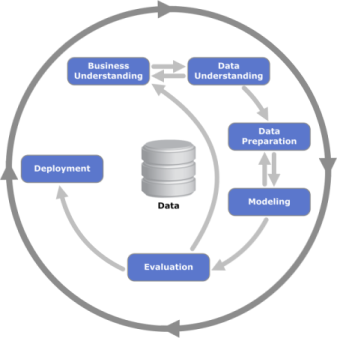

Data Understanding:
* Data apa yang tersedia?
* Seberapa banyak (dan lama) data tersedia?
* Ada yang memiliki label? (Variabel Target)
* Apakah data ini relevan? Atau bisa dibuat relevan?
* Bagaimana dengan kualitas data ini?
* Ada data tambahan (eksternal)?
* Siapa yang memahami tentang data ini dengan baik?


## EDA ?
* EDA menjadi tahapan awal dari sebagian besar proses analisis data, tahap yang menentukan seberapa baik analisis data selanjutnya akan dihasilkan.
* Kemampuan untuk melakukan EDA dengan baik merupakan syarat dasar terkait dengan pengolahan data, baik itu *business intelligence, data analyst, data scientist*, dsb
* EDA meliputi preprocessing, perhitungan statistik dasar, visualisasi, penyusunan hipotesis (dugaan awal), pemeriksaan asumsi, hingga story-telling dan reporting. Di dalamnya juga termasuk proses penanganan missing values, outlier, reduksi dimensi, pengelompokkan, transformasi dan distribusi data.
* Tools: Python, R, S-Plus, etc

## Tujuan EDA
1. Menarik hipotesis tentang penyebab fenomena yang diamati
2. Menilai asumsi yang menjadi dasar inferensi statistik
3. Mendukung pemilihan teknik statistik yang tepat
4. Memberikan dasar untuk pengumpulan data lebih lanjut
(Ref : John Tukey (1961))

# EDA dengan dataset Titanic

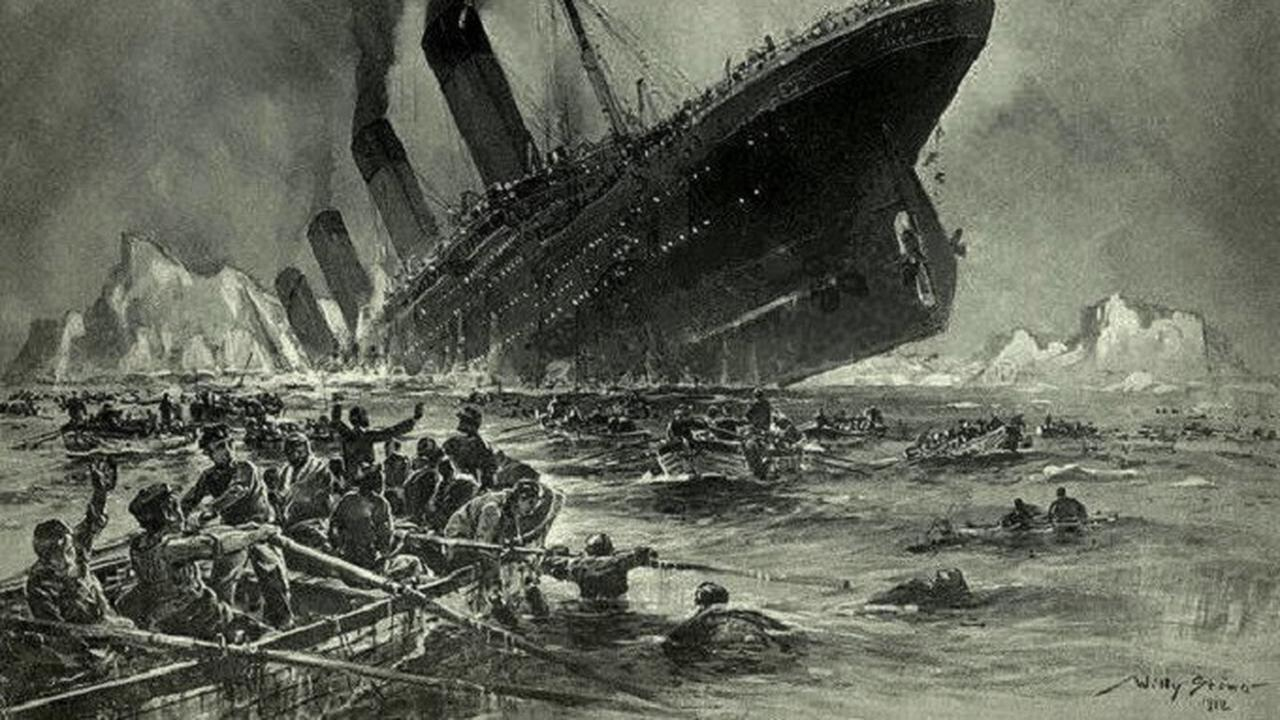

"Tenggelamnya Titanic" karya Willy Stöwer (The Vintage)

<details>

### Masalah
1. klasifikasi penumpang selamat
2. hubungan antara atribut-atribut penumpang terhadap keselamatan penumpang

### Tujuan
1. mencari hubungan atribut penumpang terhadap keselamatan dalam tenggelamnya kapal
2. melakukan prediksi berdasarkan klasifikasi penumpang

## 2. Importing Data

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
from matplotlib import pyplot as plt

import seaborn as sns

<details>
    
    * Pandas > library pada Python yang digunakan untuk memproses data (*data cleansing*, manipulasi data, analisis data).
    * Numpy > Numerical Python, library pada Python yang digunakan untuk melakukan komputasi data yang bertipe numerik.
    * Matplotlib > library pada Python yang digunakan untuk melakukan visualisasi data.
    * Seaborn > library pada Python yang digunakan untuk melakukan visualisasi data statistik dengan tampilan yang berkualitas tinggi.

In [ ]:
data = pd.read_csv('titanic.csv')

## 3. Data Understanding

<details>
    
    Tipe Data
    1. Data Continous
        * Ratio
        * Interval
    2. Data Kategorik
        * Ordinal
        * Nominal

## "mengintip" data

In [ ]:
data.head()
#data.tail()
#data.sample()


## mencari informasi data

In [ ]:
#data.shape
#data.size
#data.columns
#data.index
#data.dtypes
data.info

- dataset mempunyai 891 row dan 12 kolom

## Missing Value, Data Duplicated

In [ ]:
# Missing Value

data.isnull().sum() #atau data.isna().sum()
data.isnull().sum()*100/len(data)

In [ ]:
# cek dupliaksi row data
data.duplicated().sum()

# cek dupliksi tiap kolom
data.Ticket.duplicated().sum()

##  mengecek label/variabel target

In [ ]:
data.Survived.unique()

In [ ]:
# mengecek data unik pada 'Cabin'
data.Cabin.nunique()

#data.sort_values(['Cabin'], ascending = (True))

#cabin = data[data['Cabin'].notna()]

#cabin.head(10)

data pada kolom 'Age' dan 'Cabin' membutuhkan perhartian lebih di fase berikutnya

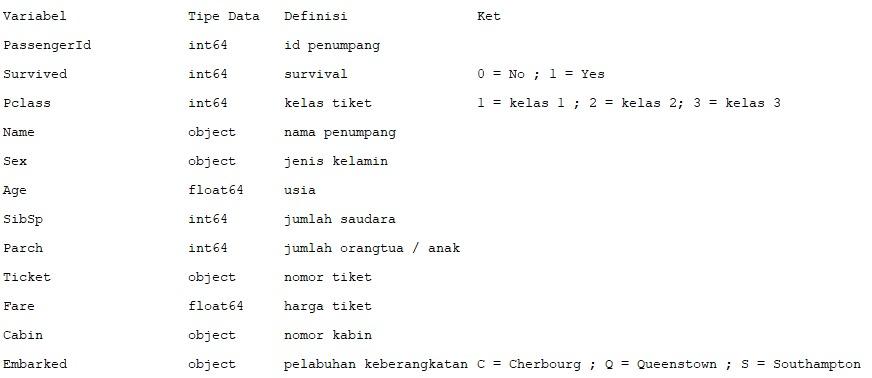

## statistik dasar

In [ ]:
## diskripsi untuk data kuantitatif
data.describe()

In [ ]:
## diskripsi untuk data kualitatif
data.describe(include=['O'])

<details>
Asumsi setelah melakukan analisis dasar

1. Korelasi: mengetahui seberapa kuat setiap fitur berkorelasi dengan 'Survived'
2. Kelengkapan :
    * 'Age' terdapat "null values", namun tidak banyak, harus diatangani
    * 'Embarked' terdapat sedikit "null values", perlu dilengkapi karena mempunyai kemungkinan berkorelasi dengan 'Survived'
3. Keakuratan : 
    * 'PassengerId' dapat dikeluarkan karena tidak berkontribusi pada keselamatan.
    * 'Ticket' terdapat dupliksi cukup banyak dan tidak berkontribusi pada keselamatan.
    * 'Cabin' terlalu banyak "null values", namun mungkin berkorelasi dengan 'Survived'
    * 'Name' unik dan tidak standar, namun tidak memiliki "null values" dan terdapat titel standar, titel kemungkinan berkorelasi dengan 'Survived'
4. Enginering:
    * 'SibSp' dapat digunakan untuk membuat kelompok, kemungkinan berkorelasi dengan 'Survived'
    * 'Parch' dapat digunakan untuk membuat fitur keluarga, kemungkinan berkorelasi dengan 'Survived'
    * 'Name' dapat dilakukan ekstraksi untuk mengeluarkan titel
    * 'Age' dapat dikelompokkan menjadi ordinal kategori
    * 'Fare' dapat dikelompokkan menjadi ordinal kategori
5. Perempuan, anak-anak, orang kaya lebih mungkin untuk bertahan hidup.
</details>

### Melihat koralasi antar fitur

In [ ]:
## correlation
data.corr()

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#plt.figure(figsize=(8,5))
#sns.heatmap(data.corr(), annot=True)

-terdapat 2 fitur, 'Pclass' dan 'Fare' yang saling berkorelasi

## Eksplorasi Variabel

### Data Kategorik

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,4))

# subplot 1
data['Survived'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Survived')
ax[0].set_ylabel('Count')


# subplot 2 
data['Sex'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[1])
ax[1].set_title('Number Of Passengers By Sex')
ax[1].set_ylabel('Count')

# subplot 3 
data['Pclass'].value_counts().sort_index().plot.bar(color=['blue','green','red'],ax=ax[2])
ax[2].set_title('Number Of Passengers By Pclass')
ax[2].set_ylabel('Count')

# show
plt.show()

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,4))

# subplot 1 
data['Embarked'].value_counts().sort_index().plot.bar(color=['blue','green','red','yellow'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Embarked')
ax[0].set_ylabel('Count')

# subplot 1
data['SibSp'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[1])
ax[1].set_title('Number Of Passengers By SibSp')
ax[1].set_ylabel('Count')


# subplot 2 
data['Parch'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[2])
ax[2].set_title('Number Of Passengers By Parch')
ax[2].set_ylabel('Count')

# show
plt.show()

### Data Continous

In [ ]:
f,ax=plt.subplots(figsize=(10,8))

plt.subplot(2,2,1)
data.Age.plot.hist()
plt.title('Age')

plt.subplot(2,2,2)
data.Fare.plot.hist()
plt.title('Fare')

### Outliers

In [ ]:
f,ax=plt.subplots(figsize=(10,8))

plt.subplot(2,2,1)
data['Age'].plot.box()
plt.title('Age')

plt.subplot(2,2,2)
data['Fare'].plot.box()
plt.title('Fare')

In [ ]:
data.plot.scatter('Age', 'Fare')

#### Kesimpulan Sementara
    - jumlah penumpang 'survived' lebih sedikit daripada 'unsurvived'
    - jumlah penumpang 'male' lebih banyak daripada penumpang 'female'
    - jumlah penumpang kelas 3 lebih banyak daripada kelas lainnya
    - jumlah penumpang sendirian lebih banyak dari pada yang keluarga dan saudara
    - jumlah penumpang dengan 'Embarked' Southampton lebih banyak daripada embarked lainnya
    - penumpang paling banyak berkisar pada usia 20 - 40 tahun
    - terdapat data outlier pada fitur 'Age' dan fitur 'Fare'
    - data pada fitur 'Age' dan 'Fare' mempunyai sebaran data tidak normal

# Analisis Bivariat

<details>
    analisis yang dilakukan untuk mengetahui hubungan/keterkaitan dua variabel/kumpulan nilai.
</details>

#### Sex vs Survived

In [ ]:
data_ct_sex = pd.crosstab(data['Sex'], data['Survived'],margins=True)
data_ct_sex.style.background_gradient(cmap='summer_r')

#### Pclass vs Survived

In [ ]:
data_ct_pclass = pd.crosstab(data['Pclass'], data['Survived'],margins=True)
data_ct_pclass.style.background_gradient(cmap='summer_r')

#### Embarked vs Survived

In [ ]:
data_ct_embarked = pd.crosstab(data['Embarked'], data['Survived'],margins=True)
data_ct_embarked.style.background_gradient(cmap='summer_r')

#### SibSp vs Survived

In [ ]:
data_ct_sibsp = pd.crosstab(data['SibSp'], data['Survived'],margins=True)
data_ct_sibsp.style.background_gradient(cmap='summer_r')

#### Parch vs Survived

In [ ]:
data_ct_parch = pd.crosstab(data['Parch'], data['Survived'],margins=True)
data_ct_parch.style.background_gradient(cmap='summer_r')

#### Uji Normalitas Data

#### Data Kualitatif

In [ ]:
from scipy.stats import chi2_contingency
  
def chi_test(data):    
    # defining the table
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

chi_test(data_ct_sex)
chi_test(data_ct_pclass)
chi_test(data_ct_embarked)
chi_test(data_ct_sibsp)
chi_test(data_ct_parch)

#### Data Kuantitatif

In [ ]:
# Age

plt.figure(figsize=(2,2))
sns.displot(data.Age, color = "green")

In [ ]:
# Fare

plt.figure(figsize=(10,5))
sns.displot(data.Fare, color = "green")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Data Kategorik vs Target (Dependent)

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,5))

# subplot 1
sns.countplot('Sex',hue='Survived',data=data, ax=ax[0])
ax[0].set_title('Sex')

# subplot 2
sns.countplot('Pclass',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Pclass')

# subplot 3
sns.countplot('Embarked',hue='Survived',data=data, ax=ax[2])
ax[2].set_title('Embarked')

# show
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))

# subplot 1
sns.countplot('SibSp',hue='Survived',data=data, ax=ax[0])
ax[0].set_title('SibSp')

# subplot 2
sns.countplot('Parch',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Parch')

# show
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))

# subplot 1
data['Embarked'].value_counts().sort_index().plot.bar(color=['blue','green','red'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Embarked')
ax[0].set_ylabel('Count')

# subplot 2 
sns.countplot('Embarked',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Embarked: Survived vs Dead')

plt.show()

#### cara coding lainnya

In [ ]:
cat_var = ['Pclass','Sex','Embarked','SibSp','Parch']

fig, axes = plt.subplots(2, 3, figsize=(15,10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=data, hue='Survived', ax=ax)
    #    print(cat, ax)

### Data Continous vs Target (Dependent)

In [ ]:
plt.figure(figsize=(10,5))

sns.distplot(data.Age[data.Survived == 0], color = 'red', label = 'not survive')
sns.distplot(data.Age[data.Survived == 1], color = 'green', label = 'survive')

kesimpulan
- Jumlah pria di kapal jauh lebih banyak daripada jumlah wanita. Namun jumlah wanita yang diselamatkan lebih banyak jumlah pria yang diselamatkan.
- Jenis kelamin mungkin menjadi variabel yang menentukan keselamatan
- **'Sex'** kemungkinan menjadi fitur yang **penting** untuk pemodelan

- Penumpang Pclass 1 mempunyai angka keselamatan yang tinggi. Meski jumlah Penumpang di Pclass 3 jauh lebih tinggi, namun angka keselamatan dari mereka rendah.
- Kelas kabin mungkin menjadi variabel yang menentukan keselamatan 
- **'Pclass'** kemungkinan menjadi fitur yang **penting** untuk pemodelan

- Pelabuhan keberangkatan tidak menunjukkan pola yang menjadi penentu keselamatan
- **'Embarked'** kemungkinan menjadi fitur yang **tidak terlalu penting** untuk pemodelan

- Penumpang yang sendirian, lebih banyak yang tidak selamat, tapi yang mempunyai saudara dan anak/orangtua 1 cenderung selamat
- **'SibSp'** dan **'Parch'** kemungkinan menjadi fitur yang **penting** untuk pemodelan

# Lanjut Ke Tahap Berikutnya (Feature Engineering)